In [1]:
import pandas as pd 
import numpy as np
from helpers import *
import coach_dicts
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, balanced_accuracy_score, precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

# Display plots inside the notebook
%matplotlib inline

# Ignore warning related to pandas_profiling
import warnings
warnings.filterwarnings('ignore') 

from pathlib import Path

# Display all dataframe columns in outputs (it has 63 columns, which is wider than the notebook)
# This sets it up to display with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 800) 
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 1800)

In [2]:
path = os.environ.get("DATA_PATH")

In [3]:
data = "intervention_only_leona_2.csv"

In [4]:
df = pd.read_csv(path + data, sep=";", low_memory = False)

In [5]:
df.replace (' ', np.nan, inplace=True)

In [6]:
column_list = df.columns.tolist()

In [7]:
column_list

['accessCodeId',
 'mtkId',
 'codeEntered',
 'registration',
 'studyInfo',
 'studyVariant',
 'coach',
 'problem',
 'dropout',
 'M1_measurementPos',
 'M2_measurementPos',
 'M3_measurementPos',
 'M4_measurementPos',
 'M5_measurementPos',
 'M6_measurementPos',
 'M7_measurementPos',
 'TI_score',
 'TI_bip1',
 'TI_bip2',
 'TI_hyp_x',
 'TI_MDE',
 'TI_dyst',
 'TI_MDE_x',
 'TI_20_xx',
 'TI_F20_8',
 'TI_F25',
 'TI_F22',
 'TI_F23',
 'TI_F29',
 'TI_MDE_vr',
 'TI_MDE_tr',
 'TI_HYP_vr',
 'TI_MAN_vr',
 'TI_medik',
 'TI_inkl',
 'TI_rekrut',
 'in_ther1',
 'in_ther2',
 'in_med1',
 'in_med2',
 '1_module',
 '2_module',
 '3_module',
 '4_module',
 '5_module',
 '6_module',
 '7_module',
 'POST_screening_start',
 'FU1_screening_start',
 'FU2_screening_start',
 'FU3_screening_start',
 '1_login',
 '2_login',
 '3_login',
 '4_login',
 '5_login',
 '6_login',
 '7_login',
 '1_login_duration',
 '2_login_duration',
 '3_login_duration',
 '4_login_duration',
 '5_login_duration',
 '6_login_duration',
 '7_login_duration',
 

### Create shortened df 

The following predictors were chosen for the current analysis:

- df2 = BDI/PHQ (Post), PHQ M1, Pre: SKID-Diagnosen, IMET, EUROHIS_QUOL, BDI, PHQ-D, PHQ-S, GAD, Soziodemographisch, Costa, GPSE, BSSS, PATHEV + EUHEALS, IPQ-R, PVQ, SEWiP, Nutzung d. Gesundheitswesens 
- additional = 2_letter, 2_letter_size, 2_fb_size, 2_reminder, 2_module, 1_letter, 1_letter_size

In [8]:
column_zwei = ['registration','studyVariant','coach','PRE_bdi1','PRE_bdi2',
               'PRE_bdi3','PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10',
               'PRE_bdi11','PRE_bdi12','PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18',
               'PRE_bdi19','PRE_bdi20','PRE_bdi21','POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9',
               'PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9','PRE_phqS10','PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5',
               'PRE_phqD6','PRE_phqD7','PRE_phqD8','PRE_phqD9', 'PRE_birth','PRE_sex','PRE_education',
               'PRE_work','PRE_household','PRE_relation','PRE_residence','PRE_internet','PRE_height','PRE_weight',
               'PRE_treatment','PRE_support','PRE_kPT','PRE_ill','PRE_sickleave','PRE_doc',
               'PRE_neurol','PRE_selfhelp','PRE_counsel','PRE_therapy','PRE_med','PRE_hospital',
               'PRE_hos_other', 'PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5',
               'PRE_eurohis6','PRE_eurohis7','PRE_eurohis8', 'TI_score','TI_bip1',
               'TI_bip2','TI_hyp_x','TI_MDE','TI_dyst','TI_MDE_x','TI_20_xx','TI_F20_8','TI_F25','TI_F22','TI_F23',
               'TI_F29','TI_MDE_vr','TI_MDE_tr','TI_HYP_vr','TI_MAN_vr','TI_medik','TI_rekrut','PRE_gad1',
               'PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7', 'PRE_costa1', 'PRE_costa2', 'PRE_costa3',
              'PRE_costa4', 'PRE_costa5', 'PRE_costa6', 'PRE_costa7', 'PRE_costa8', 'PRE_costa9', 'PRE_costa10', 'PRE_costa11',
              'PRE_costa12', 'PRE_costa13', 'PRE_costa14', 'PRE_costa15', 'PRE_costa16', 'PRE_costa17', 'PRE_costa18',
              'PRE_costa19', 'PRE_costa20', 'PRE_costa21', 'PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4',
              'PRE_pathev5', 'PRE_pathev6', 'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10', 
              'PRE_euheals1','PRE_euheals2','PRE_euheals3','PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18', 'PRE_bsss1','PRE_bsss2','PRE_bsss3',
               'PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8','PRE_bsss9','PRE_bsss10','PRE_bsss11',
               'PRE_bsss12','PRE_bsss13','PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10','PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5',
               'PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9','PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14',
               'PRE_pvq15','PRE_pvq16','PRE_pvq17','PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21', 'PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet9','PRE_imet10', 'M1_phqD1','M1_phqD2','M1_phqD3','M1_phqD4','M1_phqD5','M1_phqD6',
               'M1_phqD7','M1_phqD8','M1_phqD9']

To Do:
* df["dropout"] umändern in binäre Variablen
* Study Variant in binäre Variable
* Birth Year in Age umwandeln
* Hight und Weight in BDI umwandeln
* Anzahl Diagnosen zählen
* Therapist Variablen anonymisieren und Alter, Geschlecht, Abschluss extrahieren
* Skalen auswerten: IPQr8 umpolen, IMET10 umpolen
* Dummy Categorize TI_rekrut, PRE_work, PRE_household, PRE_residence
* Standardize TI_Score, BMI, Age, Internet (optional; not necessary for RF; erst nach Train-Test_Split)
* Transform Post_BDI to RCI 
* Idea: Handle registration date as cyclical feature
* Idea: Fancier strategies for missing values

Notizen:
* PRE_pt_planned raus, da PatientInnen ausgeschlossen werden, die eine PT geplant haben

In [9]:
df2 = df[column_zwei]

# 1. Prepare first dataframe for first analysis 

## 1.1 Check out Missing Values 

### 1.1.1 Drop rows with missing values on outcome

In [10]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 224 columns.
There are 127 columns that have missing values.


,Missing Values,% of Total Values,Missing Values
POST_phqD1,499,28.1,"[nan, 2, 0, 1, 3]"
POST_phqD6,499,28.1,"[nan, 2, 0, 1, 3]"
POST_phqD2,499,28.1,"[nan, 2, 0, 1, 3]"
POST_phqD8,499,28.1,"[nan, 0, 1, 2, 3]"
POST_phqD7,499,28.1,"[nan, 1, 0, 2, 3]"
POST_phqD9,499,28.1,"[nan, 1, 0, 2]"
POST_phqD5,499,28.1,"[nan, 1, 2, 0, 3]"
POST_phqD4,499,28.1,"[nan, 2, 1, 3, 0]"
POST_phqD3,499,28.1,"[nan, 1, 0, 2, 3]"
M1_phqD8,22,1.2,"[0, 2, 1, nan, 3]"


In [11]:
post_phq_columns = ['POST_phqD1','POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9']

In [12]:
df2 = df2[df2[post_phq_columns].notnull().all(axis=1)]

In [13]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 224 columns.
There are 105 columns that have missing values.


,Missing Values,% of Total Values,Missing Values
PRE_phqS4,16,1.3,"[1, 2, 0, nan]"
PRE_imet9,14,1.1,"[10, 5, 2, 4, 9, 3, 0, 1, 8, 7, 6, nan]"
PRE_pathev2,13,1.0,"[2, 5, 4, 1, 3, nan]"
PRE_phqS6,11,0.9,"[2, 1, 0, nan]"
PRE_imet8,9,0.7,"[10, 3, 7, 5, 0, 8, 9, 2, 4, 1, 6, nan]"
PRE_euheals3,9,0.7,"[5, 9, nan, 1]"
PRE_gpse8,7,0.5,"[2, 3, 4, 1, nan]"
PRE_phqS3,7,0.5,"[2, 0, 1, nan]"
PRE_phqS5,6,0.5,"[0, 1, 2, nan]"
PRE_gpse9,6,0.5,"[2, 3, 4, 1, nan]"


### 1.1.2 Drop columns referring to exclusion criteria

Diagnosen:
* F20.8: Schizophrenie = Exclusion criterion --> Drop 
* F29: Nicht näher bezeichnete nichtorganische Psychose = Exclusion criterion --> Drop
* F23: Akute vorübergehende psychotische Störungen = Exclusion criterion --> Drop
* F22: Wahnhafte Störung = Exclusion criterion --> Drop
* F25: Schizoaffektive Störung = Exclusion criterion --> Drop
* F20: Paranoide Schizophrenie = Exclusion criterion --> Drop
* TI_hyp_x: Hypomania --> Drop

In [14]:
exclusion_cols = ["TI_F20_8", "TI_F29", "TI_F23", "TI_F22", "TI_hyp_x", "TI_F25", "TI_20_xx"]

In [15]:
df2.drop(exclusion_cols, axis=1, inplace=True)

### 1.1.3 Replace missing categorical values with mode

Some data types are object --> we will turn them numeric to allow replacement with mode value

In [16]:
miss_df2 = missing_values_table(df2)
missing_cols = miss_df2.index.tolist()

The dataset has 217 columns.
There are 105 columns that have missing values.


In [17]:
for column in missing_cols:
    df2[column] = pd.to_numeric(df2[column], errors='coerce').astype('Int64')

In [18]:
def fillna_with_mode(df, column):
    mode = df[column].mode()[0]

    df[column] = df[column].fillna(mode)

In [19]:
for column in missing_cols:
    fillna_with_mode(df2, column)

In [20]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 217 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Missing Values


## 1.2 Aggregate and Transform columns

### 1.2.1 Turn study variant into a binary variable

In [21]:
df2['studyVariant'] = pd.get_dummies(df2['studyVariant'])

### 1.2.2 Create extra columns with number of diagnoses

In [22]:
diagnose_columns = ['TI_bip1','TI_bip2','TI_MDE','TI_dyst','TI_MDE_x','TI_MDE_vr','TI_MDE_tr','TI_HYP_vr',
                    'TI_MAN_vr','TI_medik']

In [23]:
df2["n_diagn"] = df2[diagnose_columns].sum(axis=1)

### 1.2.3 Anonymize coach variable and extract gender 

In [24]:
coach_dict = coach_dicts.coach_dict

In [25]:
anonym_dict = coach_dicts.anonym_dict


In [26]:
df2["coach_gender"] = df2["coach"]
df2.replace({"coach_gender": coach_dict}, inplace=True)

In [27]:
df2.replace({"coach": anonym_dict}, inplace=True)

In [28]:
df2["coach"] = df2["coach"].astype("|S")

### 1.2.4 Check dtypes and answer formats

In [29]:
answer_table = show_answers(df2)
answer_table

,Amount of Answers,Anwers
Item,,
registration,594,Free Input
PRE_weight,91,Free Input
PRE_birth,66,Free Input
PRE_internet,55,Free Input
PRE_height,53,Free Input
TI_score,21,Free Input
coach,20,Free Input
PRE_imet8,11,Free Input
PRE_imet10,11,Free Input


--> Data types of some scales have to be changed from object to numeric to create sum scores

### 1.2.5 Create Sum Scores of clinical screenings

#### BDI-II

In [30]:
pre_bdi_columns = ['PRE_bdi1','PRE_bdi2','PRE_bdi3',
               'PRE_bdi4','PRE_bdi5','PRE_bdi6','PRE_bdi7','PRE_bdi8','PRE_bdi9','PRE_bdi10','PRE_bdi11','PRE_bdi12',
               'PRE_bdi13','PRE_bdi14','PRE_bdi15','PRE_bdi16','PRE_bdi17','PRE_bdi18','PRE_bdi19','PRE_bdi20',
               'PRE_bdi21']

In [31]:
df2["PRE_bdi_sum"] = df2[pre_bdi_columns].sum(axis=1).astype('Int64')

In [32]:
df2["PRE_bdi_sum"].describe()

count    1278.000000
mean     21.448357  
std      4.063715   
min      14.000000  
25%      18.000000  
50%      22.000000  
75%      25.000000  
max      28.000000  
Name: PRE_bdi_sum, dtype: float64

In [33]:
miss_df2 = missing_values_table(df2)
miss_df2

The dataset has 220 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Missing Values


#### PHQ-D

In [34]:
pre_phq_columns = ['PRE_phqD1','PRE_phqD2','PRE_phqD3','PRE_phqD4','PRE_phqD5','PRE_phqD6','PRE_phqD7',
               'PRE_phqD8','PRE_phqD9']

In [35]:
df2[pre_phq_columns] = df2[pre_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [36]:
df2["phq_d_sum"] = df2[pre_phq_columns].sum(axis=1)

In [37]:
df2["phq_d_sum"].describe()

count    1278.000000
mean     11.585290  
std      3.306125   
min      4.000000   
25%      9.000000   
50%      11.000000  
75%      14.000000  
max      23.000000  
Name: phq_d_sum, dtype: float64

#### PHQ-D M1

In [38]:
m1_phq_columns = ['M1_phqD1','M1_phqD2','M1_phqD3','M1_phqD4','M1_phqD5','M1_phqD6','M1_phqD7',
               'M1_phqD8','M1_phqD9']

In [39]:
df2[m1_phq_columns] = df2[m1_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [40]:
df2["phq_m1_sum"] = df2[m1_phq_columns].sum(axis=1)

In [41]:
df2["phq_early_change"] = df2["phq_d_sum"] - df2["phq_m1_sum"]

In [42]:
df2.drop(m1_phq_columns, axis=1, inplace=True)

In [43]:
df2.drop("phq_m1_sum", axis=1, inplace=True)

 **PHQ-D Outcome**

In [44]:
post_phq_columns = ['POST_phqD1', 'POST_phqD2','POST_phqD3','POST_phqD4','POST_phqD5',
               'POST_phqD6','POST_phqD7','POST_phqD8','POST_phqD9']

In [45]:
df2[post_phq_columns] = df2[post_phq_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [46]:
df2["phq_post"] = df2[post_phq_columns].sum(axis=1)

In [47]:
df2["phq_post"].describe()

count    1278.000000
mean     6.942879   
std      4.224591   
min      0.000000   
25%      4.000000   
50%      6.000000   
75%      9.000000   
max      24.000000  
Name: phq_post, dtype: float64

In [48]:
df2.drop(post_phq_columns, axis=1, inplace=True)

#### PHQ-S

In [49]:
phq_s_columns = ['PRE_phqS1','PRE_phqS2','PRE_phqS3','PRE_phqS4','PRE_phqS5','PRE_phqS6','PRE_phqS7',
               'PRE_phqS8','PRE_phqS9', 'PRE_phqS10']

In [50]:
df2[phq_s_columns] = df2[phq_s_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [51]:
df2["phq_s_sum"] = df2[phq_s_columns].sum(axis=1)

In [52]:
df2["phq_s_sum"].describe()

count    1278.000000
mean     8.992175   
std      3.294465   
min      0.000000   
25%      7.000000   
50%      9.000000   
75%      11.000000  
max      20.000000  
Name: phq_s_sum, dtype: float64

#### EUROHIS-QOL

In [53]:
eurohis_columns = ['PRE_eurohis1','PRE_eurohis2','PRE_eurohis3','PRE_eurohis4','PRE_eurohis5','PRE_eurohis6',
                   'PRE_eurohis7','PRE_eurohis8']

In [54]:
df2[eurohis_columns] = df2[eurohis_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [55]:
df2["eurohis_sum"] = df2[eurohis_columns].sum(axis=1)

#### IMET

In [56]:
imet_columns = ['PRE_imet1','PRE_imet2','PRE_imet3','PRE_imet4','PRE_imet5','PRE_imet6','PRE_imet7',
                'PRE_imet8','PRE_imet9','PRE_imet10']

In [57]:
df2[imet_columns] = df2[imet_columns].apply(pd.to_numeric, errors='coerce')

In [58]:
df2['PRE_imet10']

1       10
3       5 
4       9 
5       4 
6       5 
8       9 
9       8 
10      5 
11      8 
13      7 
14      10
15      2 
16      2 
17      8 
18      5 
19      9 
20      8 
21      4 
22      6 
23      6 
24      7 
25      7 
26      4 
29      5 
30      5 
31      9 
32      5 
33      9 
34      6 
37      5 
38      8 
40      5 
41      0 
43      2 
44      8 
47      7 
48      8 
50      5 
51      9 
52      5 
53      10
55      4 
58      9 
59      7 
60      4 
61      4 
63      5 
64      8 
65      8 
67      3 
68      2 
69      8 
70      7 
73      10
75      6 
76      8 
77      8 
78      9 
79      4 
81      7 
82      8 
84      5 
85      8 
86      8 
87      8 
89      5 
90      5 
91      8 
92      9 
93      4 
94      2 
95      7 
96      8 
97      3 
99      8 
101     8 
102     3 
103     3 
104     7 
106     1 
108     7 
109     5 
110     3 
111     3 
112     8 
113     5 
114     7 
115     7 
116     4 
118     6 
119     5 

In [59]:
df2['PRE_imet10'] = df2['PRE_imet10'].map({0:10, 1:9, 2:8, 3:7, 4:6, 5:5, 6:4, 7:3, 8:2, 9:1, 10:0})

In [60]:
df2["imet_sum"] = df2[imet_columns].sum(axis=1)

In [61]:
df2["imet_sum"].describe()

count    1278.000000
mean     39.640063  
std      13.790082  
min      3.000000   
25%      30.000000  
50%      38.000000  
75%      49.000000  
max      88.000000  
Name: imet_sum, dtype: float64

#### GAD7

In [62]:
gad_columns= ['PRE_gad1','PRE_gad2','PRE_gad3','PRE_gad4','PRE_gad5','PRE_gad6','PRE_gad7']

In [63]:
df2[gad_columns] = df2[gad_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [64]:
df2["gad_sum"] = df2[gad_columns].sum(axis=1)

In [65]:
df2.gad_sum.describe()

count    1278.000000
mean     9.797340   
std      3.674982   
min      0.000000   
25%      7.000000   
50%      9.000000   
75%      12.000000  
max      21.000000  
Name: gad_sum, dtype: float64

**Costa**

Summenscore, keine invertierten Items. Nach Subskalen erkundigen

In [66]:
costa_columns = ['PRE_costa1', 'PRE_costa2', 'PRE_costa3','PRE_costa4', 'PRE_costa5', 'PRE_costa6', 'PRE_costa7', 
                 'PRE_costa8', 'PRE_costa9', 'PRE_costa10', 'PRE_costa11','PRE_costa12', 'PRE_costa13', 'PRE_costa14',
                 'PRE_costa15', 'PRE_costa16', 'PRE_costa17', 'PRE_costa18','PRE_costa19', 'PRE_costa20', 'PRE_costa21']

In [67]:
df2[costa_columns] = df2[costa_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [68]:
df2["costa_sum"] = df2[costa_columns].sum(axis=1).astype('Int64')

In [69]:
df2.costa_sum.describe()

count    1278.000000
mean     51.119718  
std      17.548293  
min      0.000000   
25%      39.250000  
50%      52.000000  
75%      64.000000  
max      99.000000  
Name: costa_sum, dtype: float64

**Pathev**

Therapieerwartung und Therapieevaluation. 1,3,5,7,9,10 sind negativ (invertiert). 

In [70]:
pathev_columns = ['PRE_pathev1', 'PRE_pathev2', 'PRE_pathev3', 'PRE_pathev4','PRE_pathev5', 'PRE_pathev6', 
                  'PRE_pathev7', 'PRE_pathev8', 'PRE_pathev9', 'PRE_pathev10']

In [71]:
df2[pathev_columns] = df2[pathev_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [72]:
invert_columns = ['PRE_pathev1', 'PRE_pathev3','PRE_pathev5','PRE_pathev7','PRE_pathev9', 'PRE_pathev10']

In [73]:
for column in invert_columns:
    df2[column] = df2[column].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [74]:
df2["pathev_sum"] = df2[pathev_columns].sum(axis=1).astype('Int64')

In [75]:
df2["pathev_sum"].describe()

count    1278.000000
mean     36.738654  
std      5.219738   
min      19.000000  
25%      33.000000  
50%      37.000000  
75%      40.000000  
max      50.000000  
Name: pathev_sum, dtype: float64

**Euheals**

Summenscore. Keine invertierten Items

In [76]:
euheals_columns = ['PRE_euheals1','PRE_euheals2','PRE_euheals3']

In [77]:
df2[euheals_columns] = df2[euheals_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [78]:
df2["euheals_sum"] = df2[euheals_columns].sum(axis=1).astype('Int64')

In [79]:
df2["euheals_sum"].describe()

count    1278.000000
mean     20.899844  
std      4.651284   
min      3.000000   
25%      19.000000  
50%      19.000000  
75%      27.000000  
max      27.000000  
Name: euheals_sum, dtype: float64

**IPQ-R**

Krankheitswahrnehmung. Item 8 ist invertiert. Auswertung = Summenscore


In [80]:
ipqr_columns = ['PRE_ipqr1','PRE_ipqr2','PRE_ipqr3','PRE_ipqr4','PRE_ipqr5',
               'PRE_ipqr6','PRE_ipqr7','PRE_ipqr8','PRE_ipqr9','PRE_ipqr10','PRE_ipqr11','PRE_ipqr12','PRE_ipqr13',
               'PRE_ipqr14','PRE_ipqr15','PRE_ipqr16','PRE_ipqr17','PRE_ipqr18']

In [81]:
df2[ipqr_columns] = df2[ipqr_columns].apply(pd.to_numeric, errors='coerce')

In [82]:
df2['PRE_ipqr8'] = df2['PRE_ipqr8'].map({1:5, 2:4, 3:3, 4:2, 5:1})

In [83]:
df2["ipqr_sum"] = df2[ipqr_columns].sum(axis=1).astype('Int64')

In [84]:
df2["ipqr_sum"].describe()

count    1278.000000
mean     55.755869  
std      7.290903   
min      30.000000  
25%      51.000000  
50%      56.000000  
75%      60.750000  
max      80.000000  
Name: ipqr_sum, dtype: float64

**GPSE**

Selbstwirksamkeitserwartung. Nur eine Skala --> Summenwert

In [85]:
gpse_columns = ['PRE_gpse1','PRE_gpse2','PRE_gpse3','PRE_gpse4','PRE_gpse5','PRE_gpse6',
               'PRE_gpse7','PRE_gpse8','PRE_gpse9','PRE_gpse10']

In [86]:
df2[gpse_columns] = df2[gpse_columns].apply(pd.to_numeric, errors='coerce')

In [87]:
df2["gpse_sum"] = df2[gpse_columns].sum(axis=1).astype('Int64')

In [88]:
df2["gpse_sum"].describe()

count    1278.000000
mean     24.399844  
std      4.756949   
min      10.000000  
25%      21.000000  
50%      25.000000  
75%      28.000000  
max      40.000000  
Name: gpse_sum, dtype: float64

**BSSS**

Berliner Social Support Skalen. 2 Subskalen: Perceived Support (Item 1-8), Support Seeking (Item 9-13)

In [89]:
bsss_columns = ['PRE_bsss1','PRE_bsss2','PRE_bsss3','PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7','PRE_bsss8',
                'PRE_bsss9','PRE_bsss10','PRE_bsss11','PRE_bsss12','PRE_bsss13']

In [90]:
df2[bsss_columns] = df2[bsss_columns].apply(pd.to_numeric, errors='coerce').astype('Int64')

In [91]:
df2["bsss_perceived"] = df2[['PRE_bsss1','PRE_bsss2','PRE_bsss3','PRE_bsss4','PRE_bsss5','PRE_bsss6','PRE_bsss7',
                           'PRE_bsss8']].sum(axis=1).astype('Int64')

In [92]:
df2["bsss_suppseek"] = df2[['PRE_bsss9','PRE_bsss10','PRE_bsss11','PRE_bsss12','PRE_bsss13']].sum(axis=1).astype('Int64')

**PVQ**

Subskalen: Selbstbestimmung (Item 1,11), Macht (Item 2,17), Universalismus (Item 3,8,19), Leistung (Item 4,13), Sicherheit (Item 5,14), Stimulation (Item 6,15), Konformität (Item 7,16), Tradition (Item 9, 20), Hedonismus (Item 10,21), Benevolenz (Item 12,18) --> Summenscores machen wenig Sinn

In [93]:
pvq_columns = ['PRE_pvq1','PRE_pvq2','PRE_pvq3','PRE_pvq4','PRE_pvq5','PRE_pvq6','PRE_pvq7','PRE_pvq8','PRE_pvq9',
               'PRE_pvq10','PRE_pvq11','PRE_pvq12','PRE_pvq13','PRE_pvq14','PRE_pvq15','PRE_pvq16','PRE_pvq17',
               'PRE_pvq18','PRE_pvq19','PRE_pvq20','PRE_pvq21']

In [94]:
df2[pvq_columns] = df2[pvq_columns].apply(pd.to_numeric, errors ='coerce').astype('Int64')

In [95]:
df2["pvq_self"] = df2[['PRE_pvq1', 'PRE_pvq11']].sum(axis=1).astype('Int64')

In [96]:
df2["pvq_power"] = df2[['PRE_pvq2', 'PRE_pvq17']].sum(axis=1).astype('Int64')

In [97]:
df2["pvq_uni"] = df2[['PRE_pvq3', 'PRE_pvq8', 'PRE_pvq19']].sum(axis=1).astype('Int64')

In [98]:
df2["pvq_achiev"] = df2[['PRE_pvq4','PRE_pvq13']].sum(axis=1).astype('Int64')

In [99]:
df2["pvq_sec"] = df2[['PRE_pvq5','PRE_pvq14']].sum(axis=1).astype('Int64')

In [100]:
df2["pvq_stim"] = df2[['PRE_pvq6','PRE_pvq15']].sum(axis=1).astype('Int64')

In [101]:
df2["pvq_konform"] = df2[['PRE_pvq7','PRE_pvq16']].sum(axis=1).astype('Int64')

In [102]:
df2["pvq_tradi"] = df2[['PRE_pvq9','PRE_pvq20']].sum(axis=1).astype('Int64')

In [103]:
df2["pvq_hedo"] = df2[['PRE_pvq10','PRE_pvq21']].sum(axis=1).astype('Int64')

In [104]:
df2["pvq_benev"] = df2[['PRE_pvq12','PRE_pvq18']].sum(axis=1).astype('Int64')

In [105]:
#df2.drop(pvq_columns, axis=1, inplace=True)

### 1.2.6 Change birthyear to age, registration date to registration year and month to a cyclical feature

In [106]:
df2["registration_dt"] = pd.to_datetime(df2["registration"])

In [107]:
df2["age"] = df2["registration_dt"].dt.year - df2['PRE_birth']

In [108]:
df2["registratrion_month"] = df2["registration_dt"].dt.month

In [109]:
df2["month_sin"] = np.sin((df2["registratrion_month"]-1)*(2.*np.pi/12))

In [110]:
df2["month_cos"] = np.cos((df2["registratrion_month"]-1)*(2.*np.pi/12))

In [111]:
df2["registration"] = df2["registration_dt"].dt.year

In [112]:
df2.drop(["registration_dt", "registratrion_month", "PRE_birth"], axis=1, inplace= True)

### 1.2.6 Create BMI-score from height and weight columns

In [113]:
df2['PRE_height'] = df2['PRE_height']/100

In [114]:
df2["bmi_score"] = df2['PRE_weight']/ (df2['PRE_height']*df2['PRE_height'])

In [115]:
df2.drop(['PRE_weight', 'PRE_height'], axis=1, inplace=True)

### 1.2.7 Dummy Categorize TI_rekrut, PRE_work, PRE_household, PRE_residence, Coach, registration

In [116]:
encoders_list = ["TI_rekrut", "PRE_work", "PRE_household", "PRE_residence", "coach", "registration"]

In [117]:
df2 = pd.get_dummies(df2, columns=encoders_list)

### 1.2.8 Create RCI Variable for BDI as outcome

In [118]:
df2["phq_change"] = df2["phq_d_sum"] - df2["phq_post"]

In [119]:
df2["phq_change"] = df2["phq_change"].apply(lambda x:0 if x >= 5 else 1)

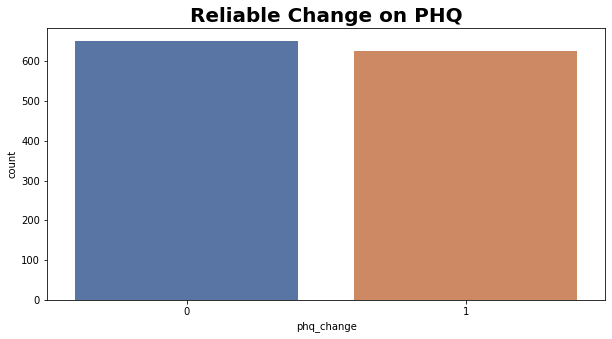

In [120]:
plt.figure(figsize=(10,5)) # Größe der Graphik festlegen
sns.countplot('phq_change',data = df2, palette="deep") # Welche Daten? Welche Farbpalette?
plt.title("Reliable Change on PHQ",fontsize=20,fontweight="bold") 
plt.show()

In [121]:
df2.drop(["phq_post"], axis=1, inplace=True)

### 1.2.9 Prepare missing values for RF Skript

In [122]:
#miss_df2 = missing_values_table(df2)

In [123]:
#df2.columns.tolist()

In [124]:
#missing_cols = list(miss_df2.index)

### 1.3 Export pepared data for RF Skript

In [125]:
filename = path + "prepared_data.csv"

In [126]:
df2.to_csv(filename, sep=";", encoding="utf-8")

In [127]:
y = df2["phq_change"]

In [128]:
X = df2.drop("phq_change", axis=1)

## 2.0 Build Support Vector Machine

In [129]:
random_state = random.sample(range(1,100),1)[0]

NameError: name 'random' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify = df2["phq_change"], random_state= 15)

### Scale BMI Score

In [ ]:
from sklearn.preprocessing import StandardScaler
bmi_scaler = StandardScaler()

In [ ]:
X_train["bmi_score"] = bmi_scaler.fit_transform(X_train[["bmi_score"]])

In [ ]:
X_test["bmi_score"] = bmi_scaler.transform(X_test[["bmi_score"]])

### Scale Age

In [ ]:
age_scaler = StandardScaler()

In [ ]:
X_train["age"] = age_scaler.fit_transform(X_train[["age"]])

In [ ]:
X_test["age"] = age_scaler.transform(X_test[["age"]])

### Scale PRE Internet

In [ ]:
internet_scaler = StandardScaler()

In [ ]:
X_train["PRE_internet"] = internet_scaler.fit_transform(X_train[["PRE_internet"]])

In [ ]:
X_test["PRE_internet"] = internet_scaler.transform(X_test[["PRE_internet"]])

### Scale Clinical Sum Scores

In [ ]:
scale_list = ["TI_score", "PRE_bdi_sum", "phq_d_sum", "phq_s_sum", "eurohis_sum", "imet_sum", "gad_sum", "costa_sum",
             "pathev_sum", "euheals_sum", "ipqr_sum", "gpse_sum", "bsss_perceived", "bsss_suppseek"]

In [ ]:
for column in scale_list:
    clinical_scaler = StandardScaler()
    X_train[column] = clinical_scaler.fit_transform(X_train[[column]])
    X_test[column] = clinical_scaler.fit_transform(X_test[[column]])

In [ ]:
X_train.head()

### 2.1 Training Set

In [ ]:
y_train = np.array(y_train)

In [ ]:
feature_names = list(X.columns)

In [ ]:
X_train = np.array(X_train)

## 3. Models

### 3.1 Support Vector Machine

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [ ]:
linear_svc = LinearSVC(C=0.001)

In [ ]:
linear_svc = linear_svc.fit(X_train, y_train)

In [ ]:
y_pred_train = linear_svc.predict(X_train)
y_pred = linear_svc.predict(X_test)

In [ ]:
y_pred.shape

In [ ]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy: {}".format(accuracy))

#print("\nOOB Score: {}".format(rf.oob_score_))

# Nun sagen wir unseren Testdatensatz mithilfe des Test Datensatzes vorher. 
# Dieser wurde von unserem Modell noch nie gesehen. 
    
svm_accuracy = accuracy_score(y_test, y_pred)
print("\nTest Accuracy: {}".format(svm_accuracy))

svm_balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("\nBalanced Accuracy: {}".format(svm_balanced_accuracy))

svm_precision = precision_score(y_test, y_pred)
print("\nPrecision: {}".format(svm_precision))

svm_recall = recall_score(y_test, y_pred)
print("\nRecall: {}".format(svm_recall))


In [ ]:
rep = classification_report(y_test, y_pred)

In [ ]:
print(rep)

In [ ]:
# Plot Confusion Matrix 
fig, ax = plt.subplots(figsize=(10, 10))

confusion_matrix(y_pred, y_test)
metrics.plot_confusion_matrix(linear_svc, X_test, y_test, normalize=None, ax=ax)

### Check feature importance 

In [ ]:
feature_names = X.columns.values

In [ ]:
b= linear_svc.coef_

In [ ]:
c= linear_svc.coef_.ravel()

In [ ]:
b.shape

In [ ]:
def feature_plot(classifier, feature_names, top_features=10):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    plt.figure(figsize=(18, 7))
    colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
    plt.show()


feature_plot(linear_svc, feature_names)

### Neural Network

In [ ]:
# Erstmal Tensorflow runterladen über Anaconda Navigator --> Open Terminal --> conda install tensorflow

import tensorflow as tf
#from tensorflow import keras
from sklearn import preprocessing

from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Flatten


In [ ]:
train_x = np.asarray(X_train).astype('float32')
train_y = np.asarray(y_train).astype('float32')
validation_x = np.asarray(X_test).astype('float32')
validation_y = np.asarray(y_test).astype('float32')

In [ ]:
print(X_train.shape[1])
feature_nr = X_train.shape[1] 

deep_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(feature_nr,)), # die Input shape hängt von der Anzahl an features ab
    tf.keras.layers.Dense(6, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid), 
])

In [ ]:
# Compiling = Konvertieren sie das Modell in eine Form, die vom Computer ausgeführt werden kann
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'binary_accuracy', 'Recall', 'Precision'])

In [ ]:
history = deep_model.fit(train_x, train_y, 
                         epochs=100, 
                         verbose = 1, 
                         batch_size=50, 
                         validation_data=(validation_x, validation_y))

test_acc = deep_model.evaluate(validation_x, validation_y)
print('Test accuracy:', test_acc)



In [ ]:
deep_model.metrics_names

In [ ]:
test_acc[0]

In [ ]:
y_pred = np.asarray([i for i in deep_model.predict_classes(validation_x)[:,0]]).astype('float32')

In [ ]:
y_pred